In [274]:
import pandas as pd
import matplotlib.pyplot as plt

In [275]:
df = pd.read_csv("crypto_data.csv")

In [276]:
# Filter out Coins that are not trading and drop the column
trading_df = df.loc[df['IsTrading'] == True].copy()
trading_df.drop('IsTrading', axis=1, inplace=True)
trading_df.rename(columns= {'Unnamed: 0':'Ticker'}, inplace=True)

In [277]:
trading_df = trading_df.dropna()
trading_df = trading_df.loc[trading_df['TotalCoinsMined'] > 0]

In [278]:
# Optional Cleaning Portion- Clean ProofType column and make 4-5 columns with information 0 and 1s around PoW/PoS/etc.
# trading_df['ProofType'].value_counts()
trading_df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [279]:
trading_df['PoW'] = 0
trading_df['PoS'] = 0
trading_df['DPoS'] = 0
trading_df['Other'] = 0

for index, row in trading_df.iterrows():
    line = row['ProofType'].lower()
    clean_line = line.replace("/", " ")
    for pt in clean_line.split():
        if pt and pt == 'pow':
            trading_df.loc[index, "PoW"] = 1
        elif pt and pt == 'pos':
            trading_df.loc[index, "PoS"] = 1
        elif pt and pt == 'dpos':
            trading_df.loc[index, "DPoS"] = 1
        else:
            trading_df.loc[index, "Other"] = 1

trading_df.drop('ProofType', axis=1, inplace=True)
trading_df

,Ticker,CoinName,Algorithm,TotalCoinsMined,TotalCoinSupply,PoW,PoS,DPoS,Other
0,42,42 Coin,Scrypt,4.199995e+01,42,1,1,0,0
2,404,404Coin,Scrypt,1.055185e+09,532000000,1,1,0,0
5,1337,EliteCoin,X13,2.927942e+10,314159265359,1,1,0,0
7,BTC,Bitcoin,SHA-256,1.792718e+07,21000000,1,0,0,0
8,ETH,Ethereum,Ethash,1.076842e+08,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,2.000000e+09,2000000000,0,0,1,0
1242,GAP,Gapcoin,Scrypt,1.493105e+07,250000000,1,1,0,0
1245,BDX,Beldex,CryptoNight,9.802226e+08,1400222610,1,0,0,0
1246,ZEN,Horizen,Equihash,7.296538e+06,21000000,1,0,0,0


In [280]:
names_df = trading_df['CoinName']
trading_df = trading_df.drop(['Ticker', 'CoinName'], axis=1)
names_df.reset_index()

,index,CoinName
0,0,42 Coin
1,2,404Coin
2,5,EliteCoin
3,7,Bitcoin
4,8,Ethereum
...,...,...
527,1238,ZEPHYR
528,1242,Gapcoin
529,1245,Beldex
530,1246,Horizen


In [282]:
names_df = names_df.reset_index()
names_df = names_df.drop('index', axis=1)
names_df

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [283]:
dummies_df = pd.get_dummies(data=trading_df, columns=['Algorithm'])
dummies_df

,TotalCoinsMined,TotalCoinSupply,PoW,PoS,DPoS,Other,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
0,4.199995e+01,42,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,1.792718e+07,21000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dummies_df)
trading_scaled = scaler.transform(dummies_df)

In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.9, random_state=5)

trading_pca = pca.fit_transform(trading_scaled)

In [286]:
trading_pca.shape

(532, 65)

In [287]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200, random_state=5)
trading_tsne = tsne.fit_transform(trading_pca)
trading_tsne.shape

(532, 2)

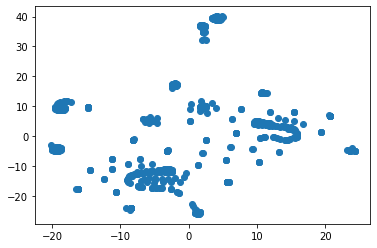

In [288]:
plt.scatter(trading_tsne[:,0], trading_tsne[:,1])

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


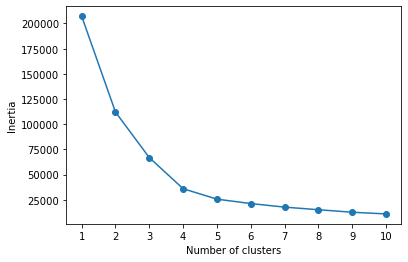

In [289]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state=5)
    km.fit(trading_tsne)
    inertia.append(km.inertia_)

elbow_data = {"k": range(1, 11), "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## I thought about my analysis here. There are definitely some clusters and I can try to find some or put some thoughts to what these clusters are.

#### I don't know much about this crypto data set, and I want to at least be able to follow up on what these clusters are. I decided to group the classes in its own column and add the CoinName column back in on the filtered data set so I can look at the coins after withdrawing from the coding portion

In [290]:
# pd.DataFrame(trading_tsne)
tsne_df = pd.DataFrame(trading_tsne)
tsne_df

,0,1
0,9.568542,4.709637
1,14.525554,-1.300310
2,23.868713,-3.865536
3,4.305201,38.816338
4,-16.207869,-17.650270
...,...,...
527,2.260482,32.414940
528,15.462565,2.381267
529,0.985886,-25.699503
530,-8.489889,-24.110872


In [291]:
names_df = pd.DataFrame(names_df)

In [297]:
tsne_df['class'] = 0
tsne_df

,0,1,class
0,9.568542,4.709637,0
1,14.525554,-1.300310,0
2,23.868713,-3.865536,0
3,4.305201,38.816338,0
4,-16.207869,-17.650270,0
...,...,...,...
527,2.260482,32.414940,0
528,15.462565,2.381267,0
529,0.985886,-25.699503,0
530,-8.489889,-24.110872,0


In [298]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(data)
    data['class'] = model.predict(data)

get_clusters(5, tsne_df)

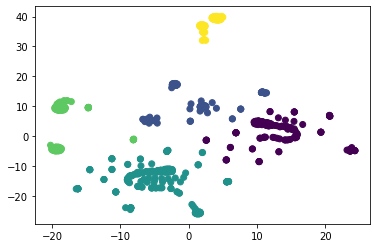

In [300]:
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])


show_clusters(tsne_df)

In [301]:
tsne_df['CoinName'] = names_df['CoinName']

In [302]:
tsne_df

,0,1,class,CoinName
0,9.568542,4.709637,0,42 Coin
1,14.525554,-1.300310,0,404Coin
2,23.868713,-3.865536,0,EliteCoin
3,4.305201,38.816338,4,Bitcoin
4,-16.207869,-17.650270,2,Ethereum
...,...,...,...,...
527,2.260482,32.414940,4,ZEPHYR
528,15.462565,2.381267,0,Gapcoin
529,0.985886,-25.699503,2,Beldex
530,-8.489889,-24.110872,2,Horizen


In [307]:
tsne_df.loc[tsne_df['class'] == 3]

,0,1,class,CoinName
6,-18.818539,9.154795,3,Dash
16,-18.977943,-4.961877,3,Spreadcoin
33,-19.139338,-5.006013,3,CryptCoin
50,-14.688643,9.500508,3,HyperStake
52,-18.054295,9.419672,3,IOCoin
...,...,...,...,...
499,-17.805683,11.846379,3,Piggy Coin
505,-19.051058,11.069881,3,CapriCoin
512,-8.091415,-1.229992,3,Lisk
519,-8.091475,-1.230095,3,EOS


#### I have clustered the groups into 5 classes, and I'm able to provide a class ID along with the CoinNames!